# Making a CNN using Keras to classify the images

## Data preparation and visualization

### Library Imports

In [1]:
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import seaborn as sns
from sklearn import metrics

Using TensorFlow backend.


### Importing Datasets

In [2]:
train = pd.read_csv("Data/fashion-mnist_train.csv")
test = pd.read_csv("Data/fashion-mnist_test.csv")

#### Printing size (Rows and Columns) of the datasets

In [3]:
print(train.shape)
print(test.shape)

(60000, 785)
(10000, 785)


### Head of the train data

In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Each image is 28x28, so there are 784 pixels per image.

Each pixel holds a value between 0 and 255 (grayscale).

1 column is for label value, seen below

### Labels and their descriptions:


| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

### Function to convert label values to their desciptions

In [8]:
values = {0: "T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat", 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle Boot"}
def lab_to_desc(label):
    return values[label]

### Converting the dataframe to a numpy array, so as to be able to visualize it

In [9]:
train_arr = np.array(train)
test_arr = np.array(test)
train_arr

array([[2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       ...,
       [8, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Plotting one of the images, and printing its label.

Image 1 label:  9
Image 2 label:  1


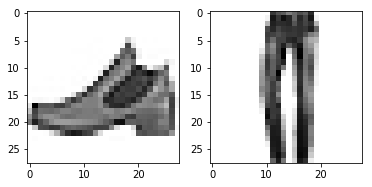

In [10]:
fig = plt.figure()

# From training dataset
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(train_arr[1, 1:].reshape(28, 28), cmap="Greys")
print("Image 1 label: ",train_arr[1, 0])

# From testing dataset
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(test_arr[1, 1:].reshape(28, 28), cmap="Greys")
print("Image 2 label: ",test_arr[1, 0])

We can see that it is an ankle boot (label 9), and a Trouser (label 1)

### Normalizing the Data for our Neural Network

We do this because Neural Networks work well with comparable ranged inputs.

Dividing by 255 to get values between 0 and 1

In [11]:
train_X = train_arr[:, 1:]/255
test_X = test_arr[:, 1:]/255
print(train_X.shape)
print(test_X.shape)

(60000, 784)
(10000, 784)


Making y (output) datasets from the 1st column of the data

In [12]:
train_y = train_arr[:, 0]
test_y = test_arr[:, 0]

### Reshaping the datasets as 28x28 inputs

In [13]:
train_X = train_X.reshape([train_X.shape[0], 28, 28, 1])
print(train_X.shape)
test_X = test_X.reshape([test_X.shape[0], 28, 28, 1])
print(test_X.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Now that our data is ready, we can begin with making a Keras model

### Library Imports

In [14]:
from keras.models import Sequential
from keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

### A basic, small Sequential model first.

In [16]:
classifier1 = Sequential()
classifier1.add(Conv2D(32, (2, 2), input_shape=(28, 28, 1), activation='relu'))
classifier1.add(MaxPooling2D(pool_size=(2, 2)))
classifier1.add(Flatten())
classifier1.add(Dense(units = 16, activation = 'relu'))
# 10 units in the last Dense layer as there are 10 classes to be classified into
classifier1.add(Dense(units = 10, activation = 'sigmoid'))

In [17]:
classifier1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                86544     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                170       
Total params: 86,874
Trainable params: 86,874
Non-trainable params: 0
_________________________________________________________________


In [18]:
classifier1.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Fitting the data onto the model

In [19]:
%%time
history = classifier1.fit(train_X, train_y, epochs=10, batch_size=256)

Epoch 1/10
60000/60000 [==============================] - 42s 702us/step - loss: 1.3054 - acc: 0.1252
Epoch 2/10
60000/60000 [==============================] - 17s 280us/step - loss: 1.0198 - acc: 0.1011
Epoch 3/10
60000/60000 [==============================] - 16s 273us/step - loss: 0.9724 - acc: 0.1046
Epoch 4/10
60000/60000 [==============================] - 16s 271us/step - loss: 0.9483 - acc: 0.1114
Epoch 5/10
60000/60000 [==============================] - 16s 273us/step - loss: 0.9279 - acc: 0.1152
Epoch 6/10
60000/60000 [==============================] - 17s 290us/step - loss: 0.9145 - acc: 0.1183
Epoch 7/10
60000/60000 [==============================] - 16s 265us/step - loss: 0.9038 - acc: 0.1259
Epoch 8/10
60000/60000 [==============================] - 17s 276us/step - loss: 0.8960 - acc: 0.1345
Epoch 9/10
60000/60000 [==============================] - 17s 290us/step - loss: 0.7909 - acc: 0.3323
Epoch 10/10
60000/60000 [==============================] - 17s 277us/step - loss: 

#### Plotting changes in accuracy

dict_keys(['loss', 'acc'])


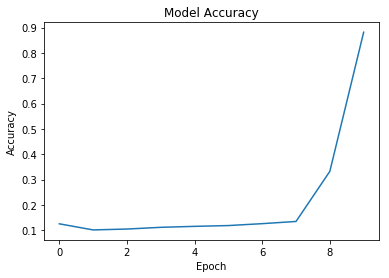

In [20]:
print(history.history.keys())

plt.plot(history.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

#### Evaluating the model on our test dataset

In [25]:
result = classifier1.evaluate(x=test_X, y=test_y)
print("Accuracy of the model is: %.2f percent"%(result[1]*100))

10000/10000 [==============================] - 2s 235us/step
Accuracy of the model is: 88.30 percent


**Good results, for a relatively small model. Let us visualize the results with a few random images and their results**

In [22]:
import random

In [23]:
predictions = classifier1.predict_classes(test_X)

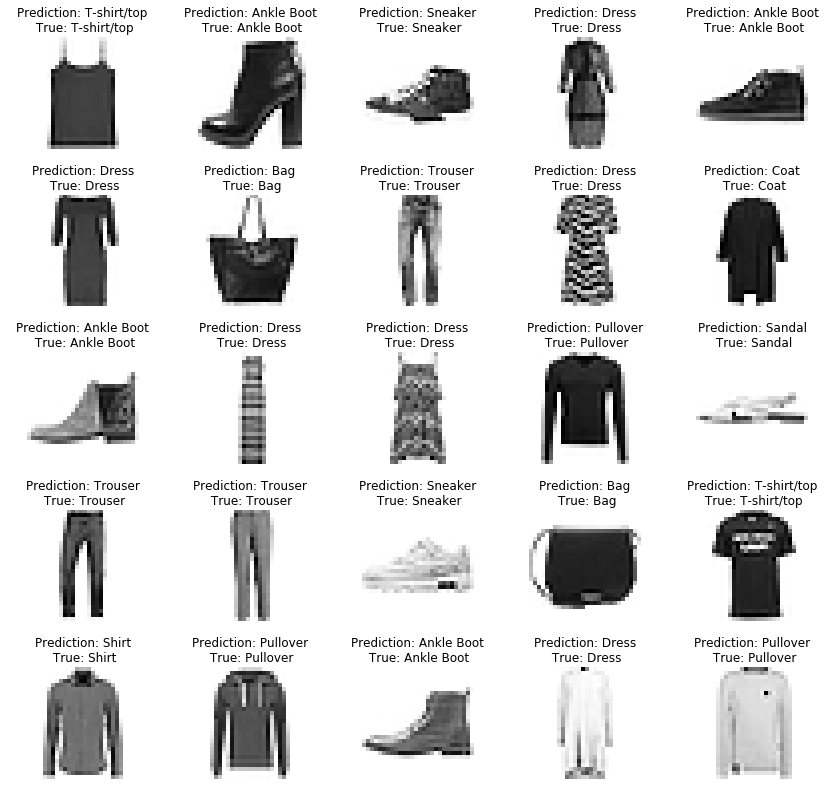

In [27]:
fig, axes = plt.subplots(5, 5, figsize=(14, 14))
# axes is currently in multiple lists, ravel reshapes it to 1D
axes = axes.ravel()

randnum = random.randint(0, 9975)

for i in range(25):
    axes[i].imshow(test_X[randnum + i].reshape(28, 28), cmap="Greys")
    axes[i].set_title('Prediction: %s\n True: %s' %
                      (lab_to_desc(predictions[randnum + i]), lab_to_desc(test_y[randnum + i])))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

**Let us try with a bigger, more complicated CNN, hopefully we get better results**

### Bigger CNN

In [34]:
classifier = Sequential()
classifier.add(Conv2D(128, (3, 3), input_shape=(28, 28, 1), activation='relu'))
classifier.add(Conv2D(128, (3, 3), input_shape=(28, 28, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=10, activation='sigmoid'))

In [35]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 128)       147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               409728    
__________

In [37]:
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Fitting the data on the model

In [38]:
%%time
history = classifier.fit(train_X, train_y, epochs=25, batch_size=256)

Epoch 1/25
60000/60000 [==============================] - 149s 2ms/step - loss: 0.9900 - acc: 0.6194
Epoch 2/25
60000/60000 [==============================] - 145s 2ms/step - loss: 0.5621 - acc: 0.7889
Epoch 3/25
60000/60000 [==============================] - 143s 2ms/step - loss: 0.4371 - acc: 0.8471
Epoch 4/25
60000/60000 [==============================] - 143s 2ms/step - loss: 0.3692 - acc: 0.8724
Epoch 5/25
60000/60000 [==============================] - 143s 2ms/step - loss: 0.3278 - acc: 0.8858
Epoch 6/25
60000/60000 [==============================] - 143s 2ms/step - loss: 0.3038 - acc: 0.8962
Epoch 7/25
60000/60000 [==============================] - 143s 2ms/step - loss: 0.2789 - acc: 0.9054
Epoch 8/25
60000/60000 [==============================] - 143s 2ms/step - loss: 0.2632 - acc: 0.9094
Epoch 9/25
60000/60000 [==============================] - 143s 2ms/step - loss: 0.2473 - acc: 0.9139
Epoch 10/25
60000/60000 [==============================] - 143s 2ms/step - loss: 0.2309 - a

#### Plotting changes in accuracy

dict_keys(['acc', 'loss'])


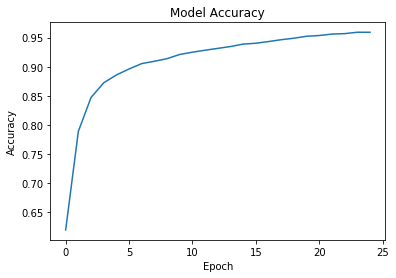

In [39]:
print(history.history.keys())

plt.plot(history.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

#### Evaluating the model on our test dataset

In [43]:
result = classifier.evaluate(x=test_X, y=test_y)
print("Accuracy of the model is: %.2f percent"%(result[1]*100))

10000/10000 [==============================] - 9s 928us/step
Accuracy of the model is: 92.90 percent


**Better results with a more complicated network, as expected.**

**Let us visualize the results with a few random images and their results**

In [44]:
predictions = classifier.predict_classes(test_X)

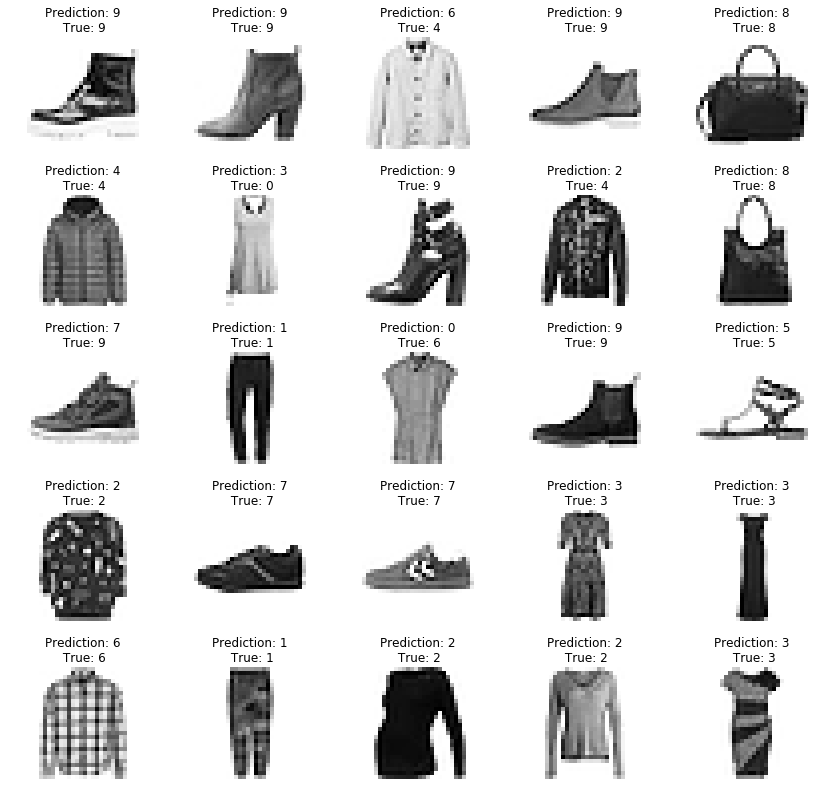

In [45]:
fig, axes = plt.subplots(5, 5, figsize=(14, 14))
# axes is currently in multiple lists, ravel reshapes it to 1D
axes = axes.ravel()

randnum = random.randint(0, 9975)

for i in range(25):
    axes[i].imshow(test_X[randnum + i].reshape(28, 28), cmap="Greys")
    axes[i].set_title('Prediction: %d\n True: %d' %
                      (predictions[randnum + i], test_y[randnum + i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

### Saving the model locally, so it can be loaded later

In [46]:
classifier.save_weights("CNN2.h5")
print("Saved model to disk.")

Saved model to disk.


# **Hence we have successfully made high accuracy image classifications using Convolutional Neural Networks through Keras**